# Explore here

In [2]:

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor, plot_importance

# Student Performance Project

In [3]:
# carga de la data
df_sp = pd.read_csv('/workspaces/Aplicacion-Web-ML-Flask-Render/data/raw/StudentPerformanceFactors.csv')
df_sp.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df_sp.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [5]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

Analizamos y eliminamos valores nulos

In [6]:
df_sp.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [7]:
df_clean = df_sp.dropna(axis=0)
df_clean.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [8]:
df_clean.shape

(6378, 20)

In [9]:
df_clean.duplicated().sum()

np.int64(0)

No se encontraron valores duplicados

# Análisis Exploratorio de Datos

### Analisis Variables Numéricas

/tmp/ipykernel_735/76333883.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_clean, palette='viridis')
/tmp/ipykernel_735/76333883.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_clean, palette='viridis')
/tmp/ipykernel_735/76333883.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_clean, palette='viridis')
/tmp/ipykernel_735/76333883.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and se

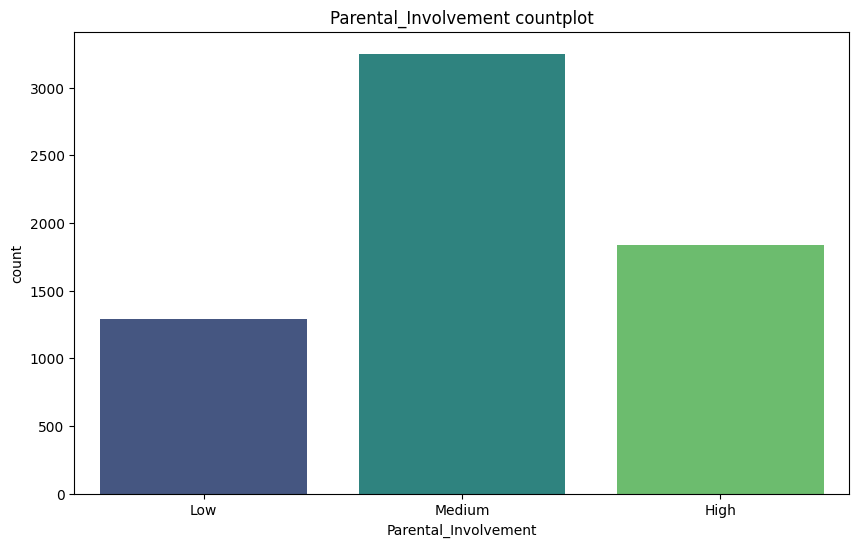

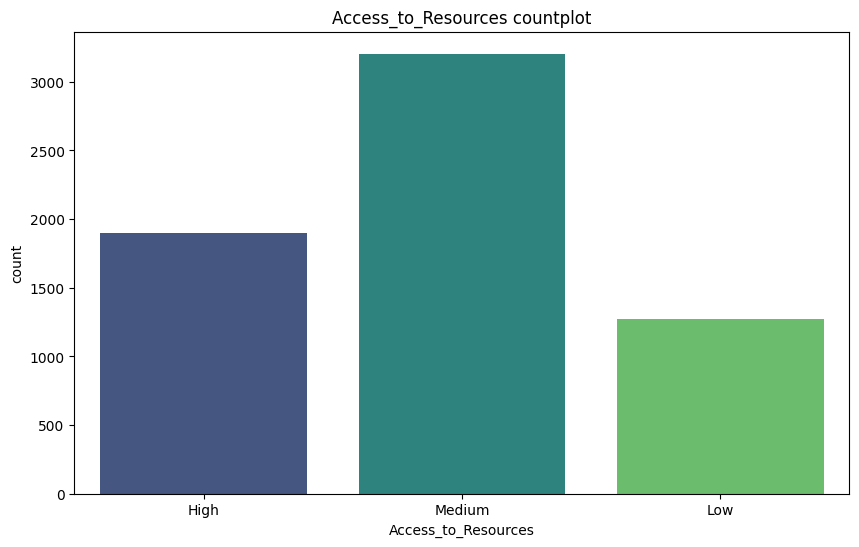

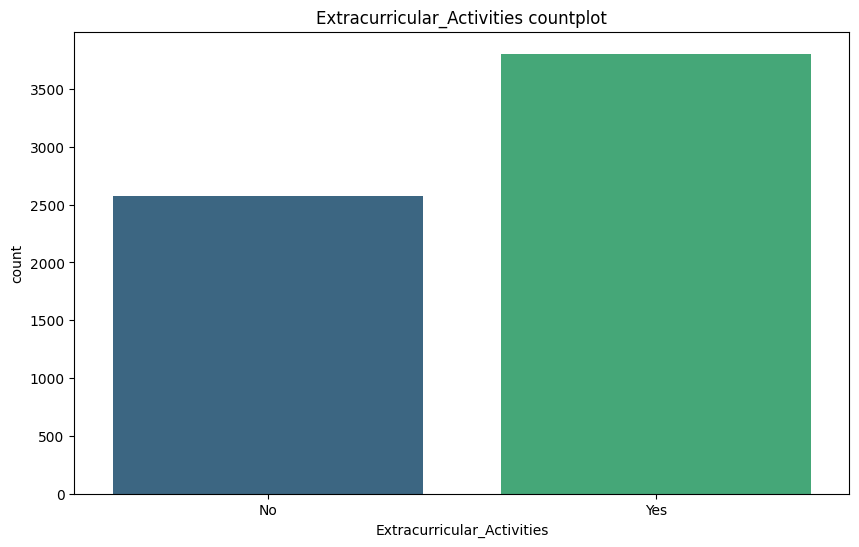

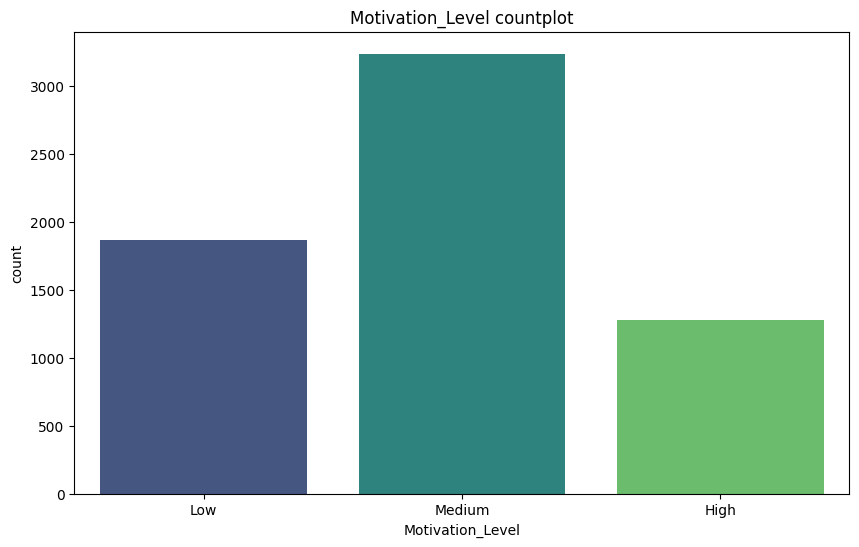

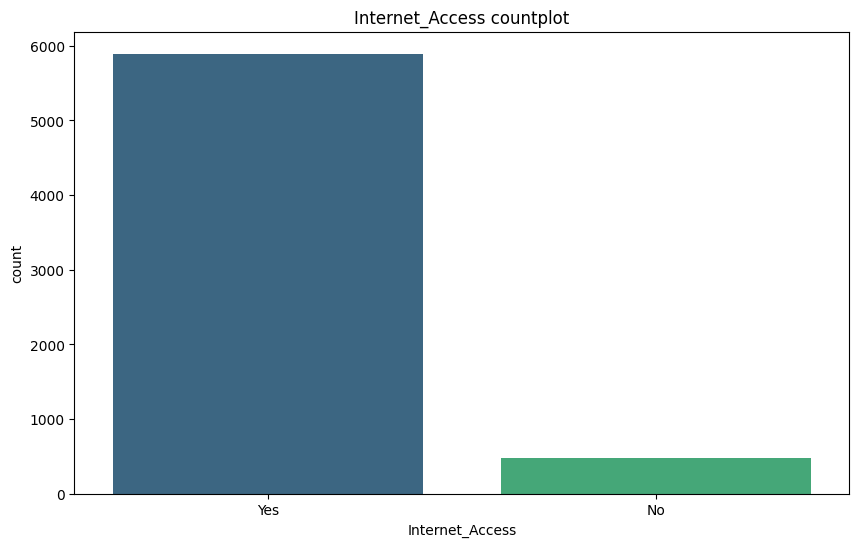

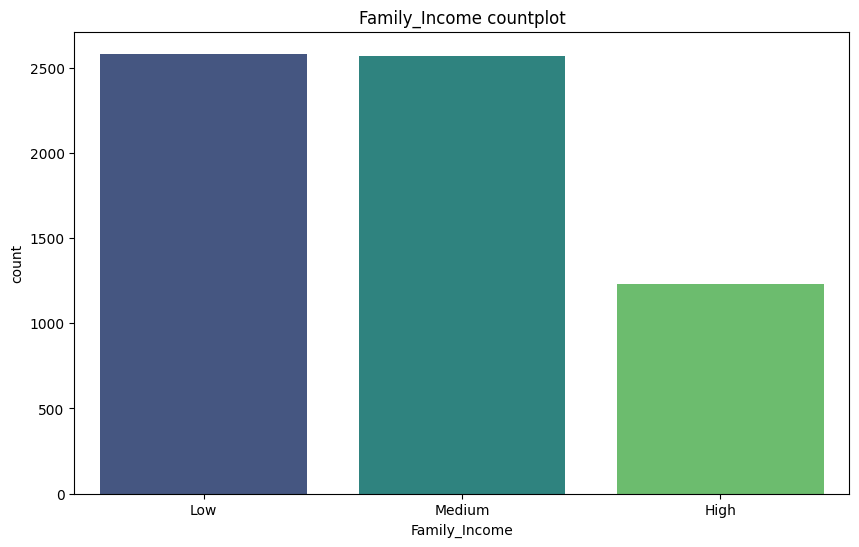

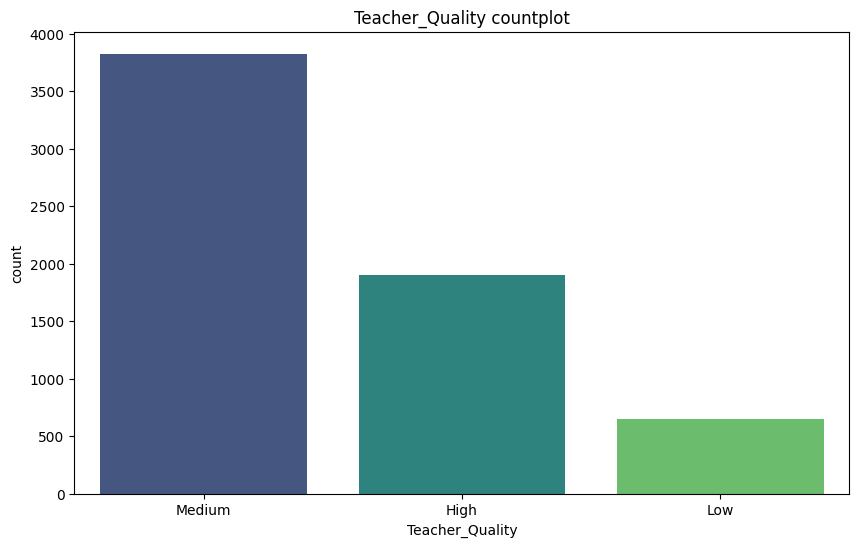

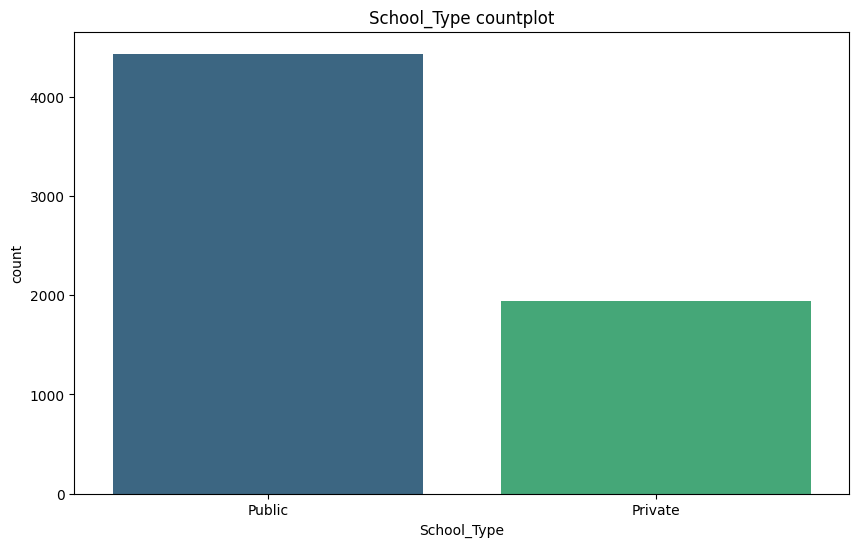

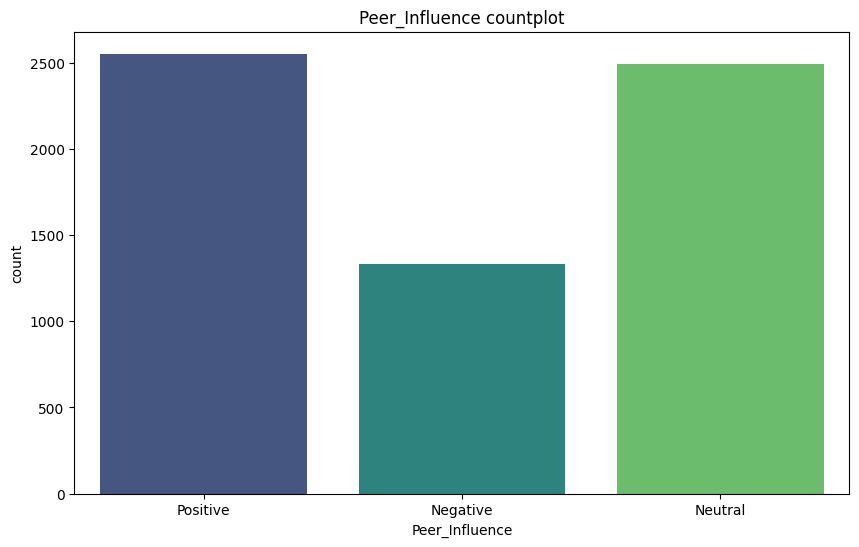

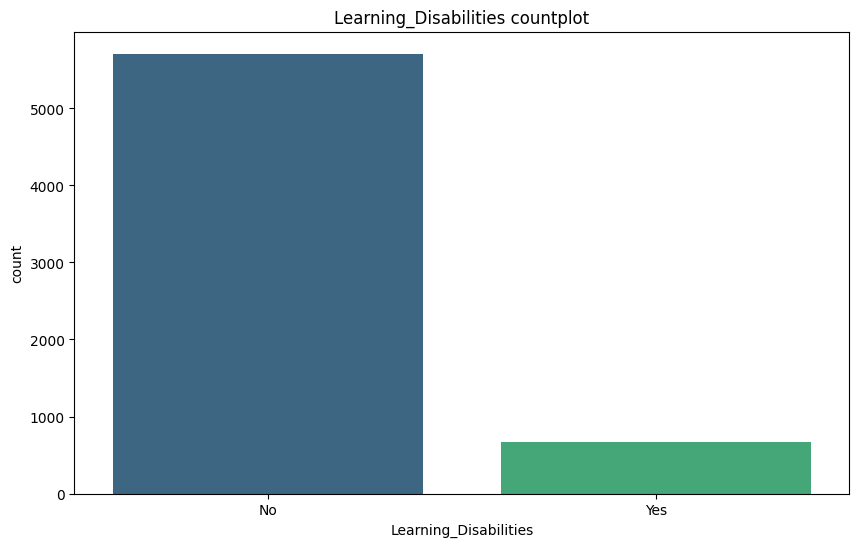

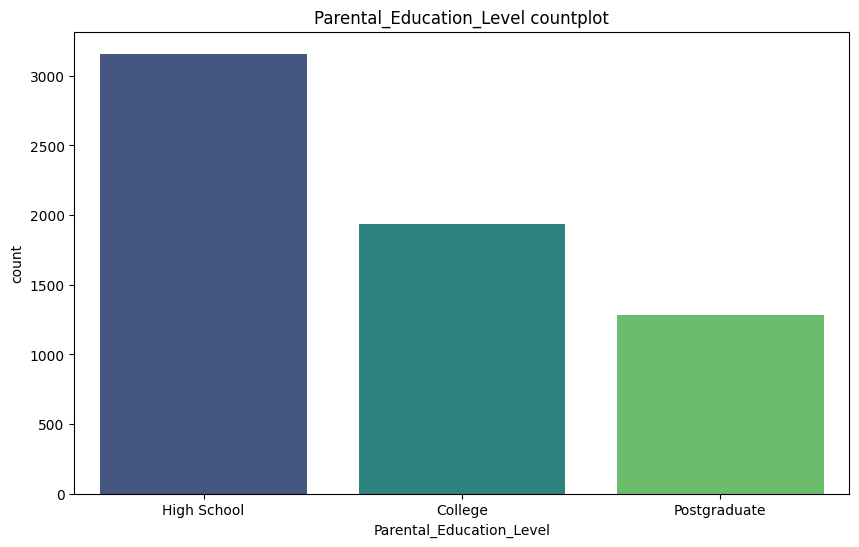

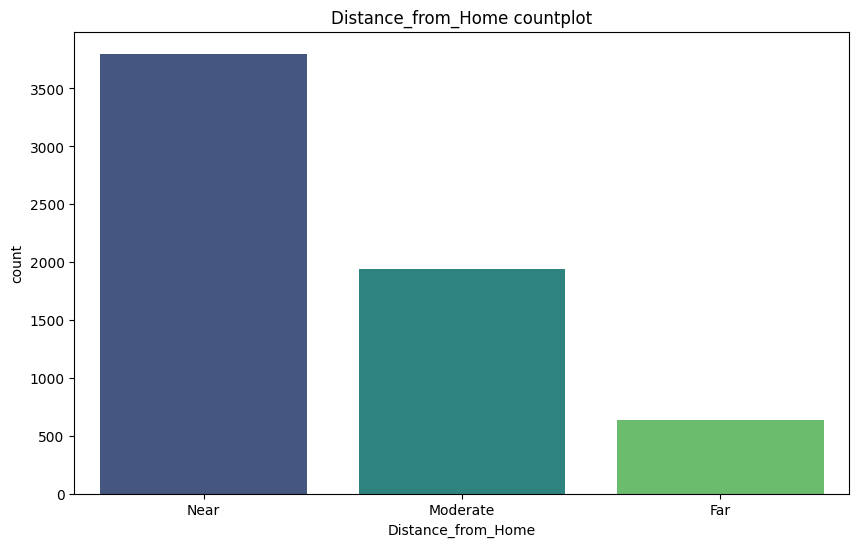

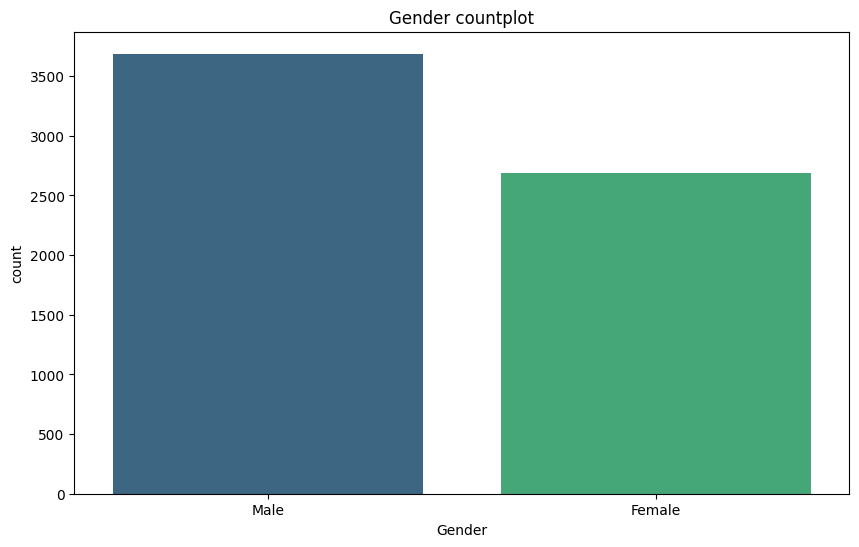

In [10]:

for col in df_clean.select_dtypes(include=['object']).columns:
  # bar count for each categorical column
  plt.figure(figsize=(10,6))
  sns.countplot(x=col, data=df_clean, palette='viridis')
  plt.title(f'{col} countplot')

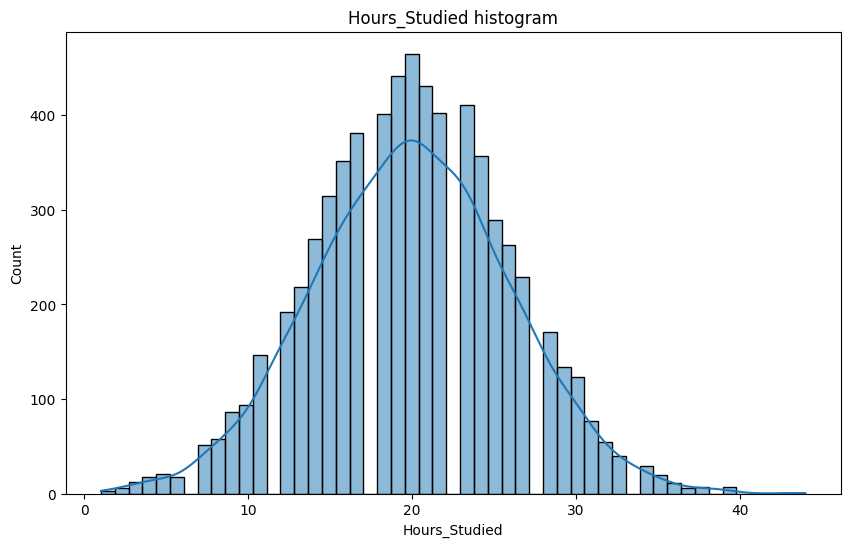

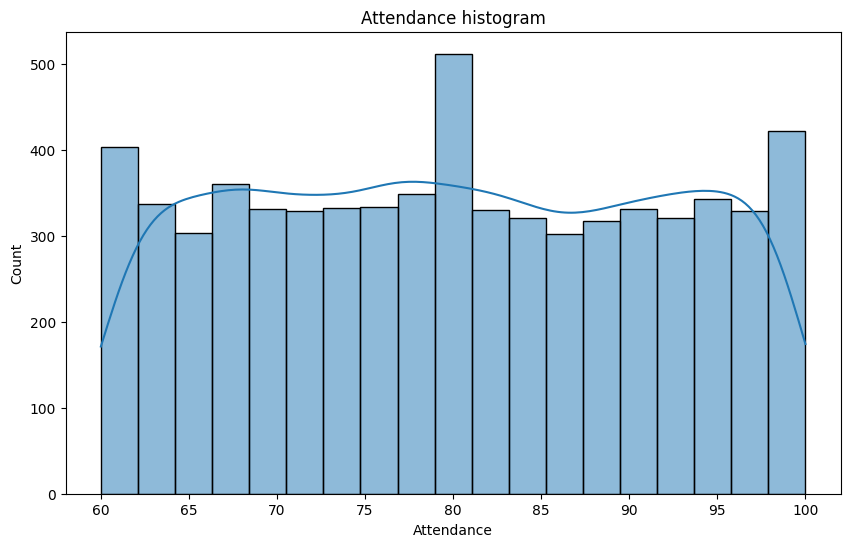

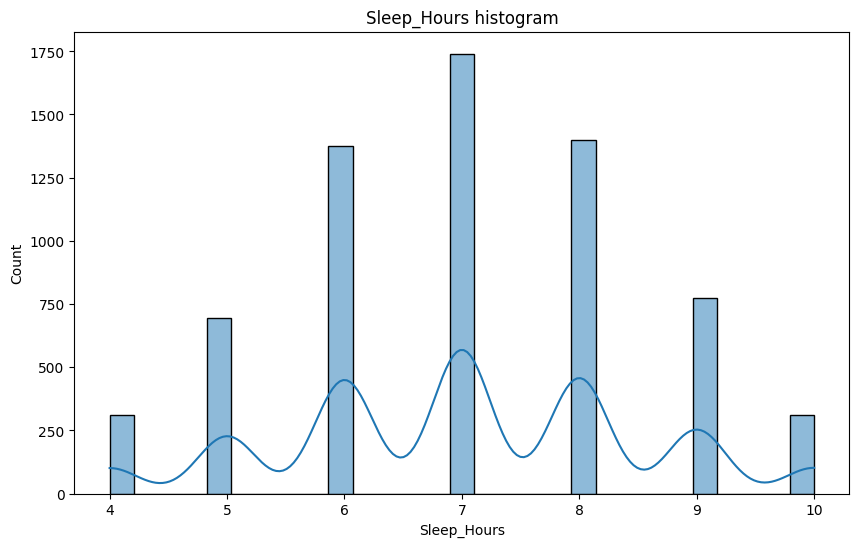

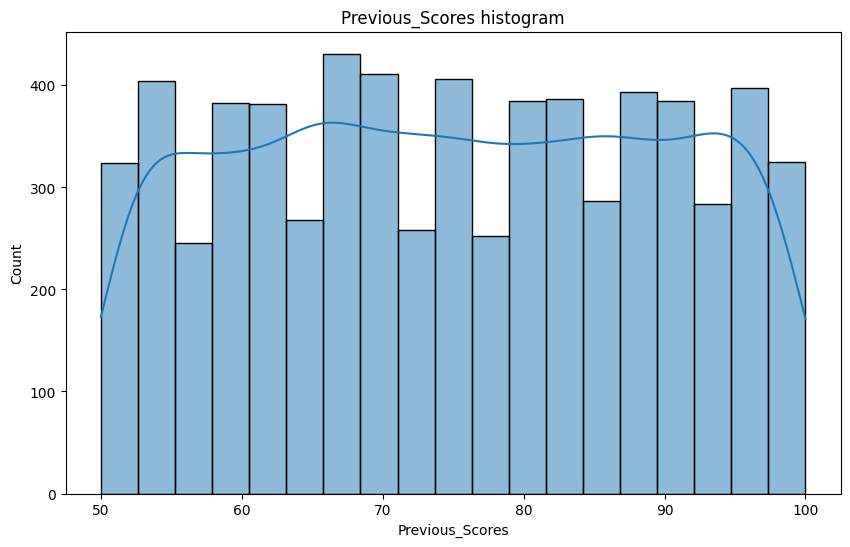

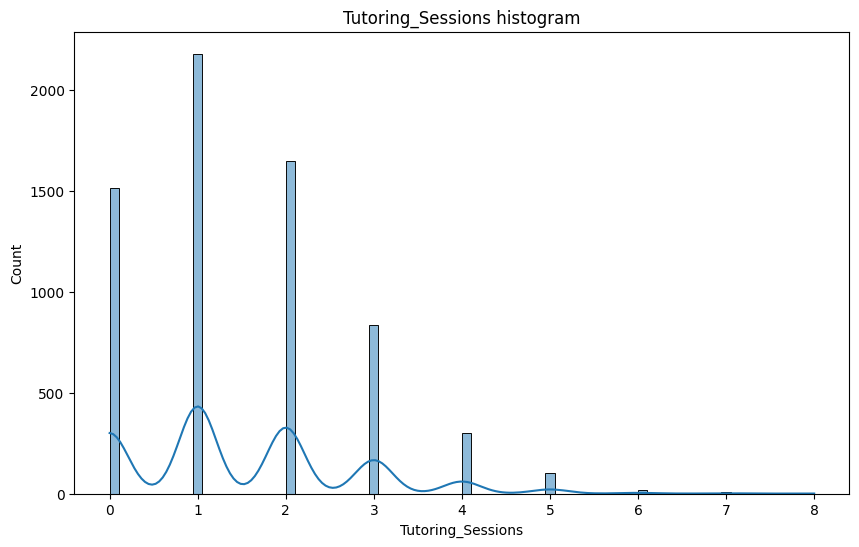

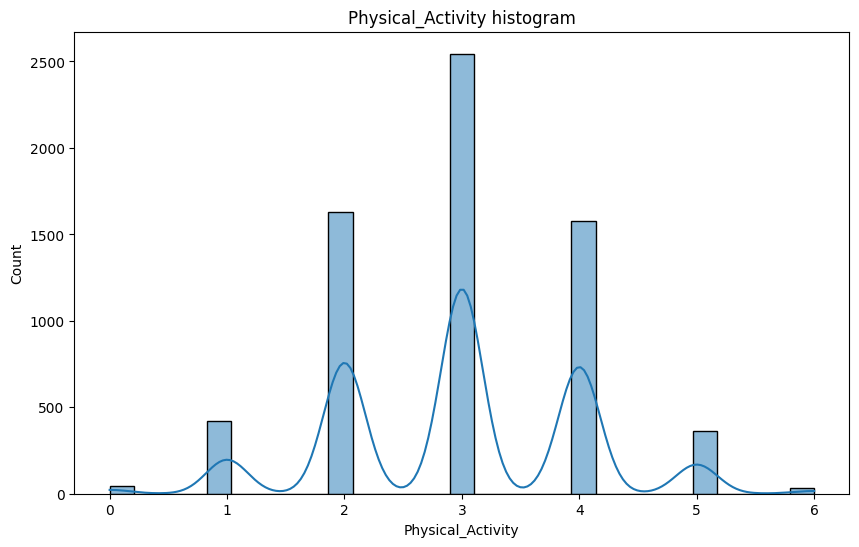

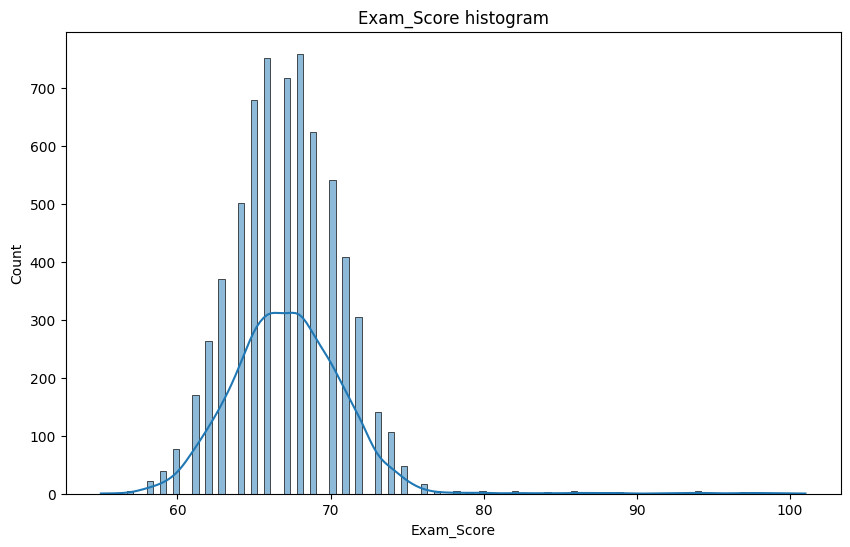

In [11]:
# Histogramas

for col in df_sp.select_dtypes(include=['int']).columns:
  # histogram for numerical columns
  plt.figure(figsize=(10,6))
  sns.histplot(df_sp[col], kde=True)
  plt.title(f'{col} histogram')

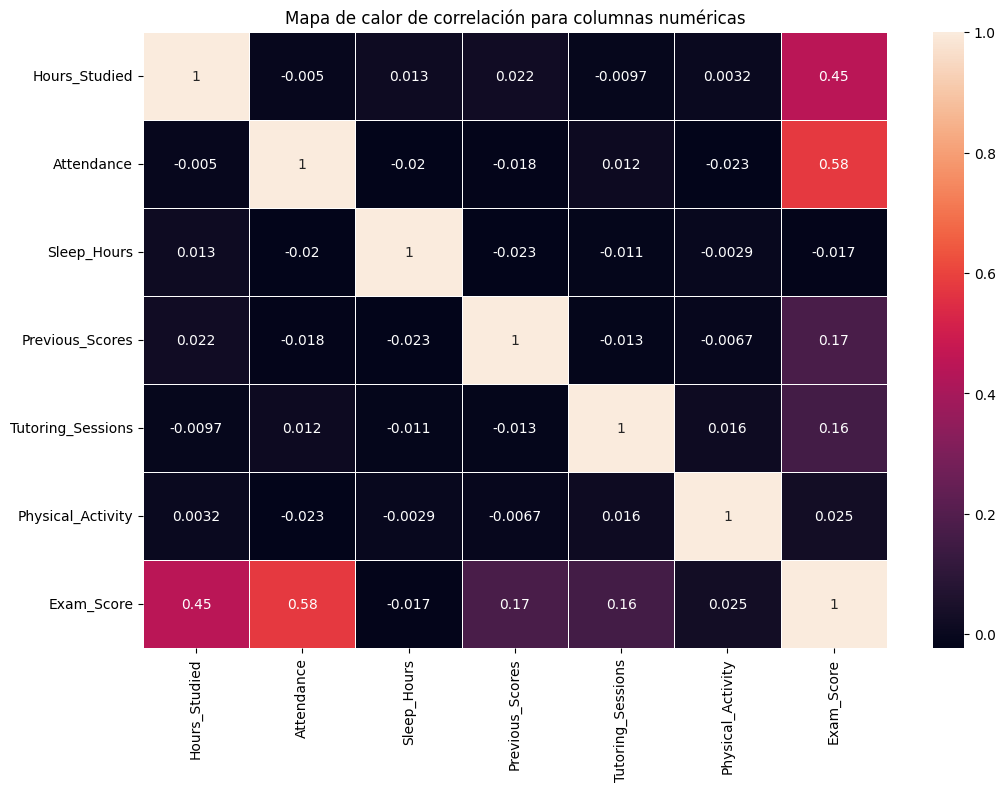

In [12]:
# Select only numerical columns 
numerical_df = df_clean.select_dtypes(include=['number'])

# Compute correlation matrix for numerical columns
corr_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)

plt.title('Mapa de calor de correlación para columnas numéricas')
plt.show()

Entre las columnas numéricas  Hours_Studied y Attendence se correlacionan positivamente con Exam_Score.

### Preparamos la data para crear modelo

In [13]:
# eliminar las columnas no deseadas

df_clean = df_clean.drop(columns=['Gender'], axis=1)

In [14]:
# Define manual mappings for each ordinal column
mappings = {
    'Parental_Involvement': {'Low': 0, 'Medium': 1, 'High': 2},
    'Access_to_Resources': {'Low': 0, 'Medium': 1, 'High': 2},
    'Motivation_Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Family_Income': {'Low': 0, 'Medium': 1, 'High': 2},
    'Teacher_Quality': {'Low': 0, 'Medium': 1, 'High': 2},
    'Peer_Influence': {'Negative': 0, 'Neutral': 1, 'Positive': 2},
    'Distance_from_Home': {'Far': 2, 'Moderate': 1, 'Near': 0}
}

# Apply the mappings to the DataFrame
for col, mapping in mappings.items():
    df_clean[col + '_encoded'] = df_clean[col].map(mapping)

# Drop the original ordinal columns
df_clean = df_clean.drop(columns=[col for col in mappings.keys()])

# Apply One-Hot Encoding to nominal columns
one_hot_encode_cols = ['Extracurricular_Activities', 'Internet_Access', 'School_Type',
                       'Learning_Disabilities', 'Parental_Education_Level']
df_clean = pd.get_dummies(df_clean, columns=one_hot_encode_cols, dtype=int)

df_clean.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_encoded,Access_to_Resources_encoded,Motivation_Level_encoded,...,Extracurricular_Activities_Yes,Internet_Access_No,Internet_Access_Yes,School_Type_Private,School_Type_Public,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate
0,23,84,7,73,0,3,67,0,2,0,...,0,0,1,0,1,1,0,0,1,0
1,19,64,8,59,2,4,61,0,1,0,...,0,0,1,0,1,1,0,1,0,0
2,24,98,7,91,2,4,74,1,1,1,...,1,0,1,0,1,1,0,0,0,1
3,29,89,8,98,1,4,71,0,1,1,...,1,0,1,0,1,1,0,0,1,0
4,19,92,6,65,3,4,70,1,1,1,...,1,0,1,0,1,1,0,1,0,0


In [30]:
df_clean.columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score',
       'Parental_Involvement_encoded', 'Access_to_Resources_encoded',
       'Motivation_Level_encoded', 'Family_Income_encoded',
       'Teacher_Quality_encoded', 'Peer_Influence_encoded',
       'Distance_from_Home_encoded', 'Extracurricular_Activities_No',
       'Extracurricular_Activities_Yes', 'Internet_Access_No',
       'Internet_Access_Yes', 'School_Type_Private', 'School_Type_Public',
       'Learning_Disabilities_No', 'Learning_Disabilities_Yes',
       'Parental_Education_Level_College',
       'Parental_Education_Level_High School',
       'Parental_Education_Level_Postgraduate'],
      dtype='object')

In [48]:
# Lista de columnas 
columnas_a_conservar = [
    'Attendance',
    'Hours_Studied',
    'Access_to_Resources_encoded',
    'Parental_Involvement_encoded',
    'Exam_Score'
]

df_clean = df_clean[columnas_a_conservar]

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Attendance                    6378 non-null   int64
 1   Hours_Studied                 6378 non-null   int64
 2   Access_to_Resources_encoded   6378 non-null   int64
 3   Parental_Involvement_encoded  6378 non-null   int64
 4   Exam_Score                    6378 non-null   int64
dtypes: int64(5)
memory usage: 299.0 KB


In [38]:
df_clean.columns

Index(['Attendance', 'Hours_Studied', 'Access_to_Resources_encoded',
       'Parental_Involvement_encoded', 'Exam_Score'],
      dtype='object')

In [33]:
df_clean.to_csv('/workspaces/Aplicacion-Web-ML-Flask-Render/data/processed/df_clean.csv', index=False)

### Modelo XGBRegressor

In [39]:
X = df_clean.drop(columns=['Exam_Score'], axis=1)
y = df_clean['Exam_Score']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Attendance,Hours_Studied,Access_to_Resources_encoded,Parental_Involvement_encoded
2356,95,18,2,0
4758,89,16,1,2
2281,69,16,2,1
485,65,11,2,1
4200,95,21,2,1


In [41]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
y_pred = model.predict(X_test)

In [43]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 7.468201513170554
R^2 Score: 0.519399881362915


### Optimización de Hiperparámetros con GridSearchCV

In [44]:
model = XGBRegressor()

# Definir la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

In [45]:
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Usar MSE para la evaluación
                           cv=5,  # Número de folds para la validación cruzada
                           verbose=1,
                           n_jobs=-1)  # Usa todos los núcleos disponibles

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [46]:
# Imprimir los mejores parámetros
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el modelo en el conjunto de prueba con los mejores parámetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score (R2): {r2}')

Mejores parámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Mean Squared Error: 6.131531088371613
R^2 Score: 0.6054184436798096


### Guardado del modelo

In [49]:
from pickle import dump

dump(best_model, open("/workspaces/Aplicacion-Web-ML-Flask-Render/models/model_xgbregressor_42_studentperformance.sav", "wb"))